In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv("admissions_data.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Data has different scales

In [5]:
labels = df.iloc[:,-1]
features = df.iloc[:, 1:8]

In [6]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, random_state = 42)


In [7]:
sc = StandardScaler()
features_train_scale = sc.fit_transform(features_train)
features_test_scale = sc.transform(features_test)

In [16]:
model = Sequential(name="admission_model")
num_features = features_train.shape[1]
input = layers.InputLayer(input_shape=(num_features,))
model.add(input)
hidden_layer = layers.Dense(16, activation='relu')
model.add(hidden_layer)
model.add(layers.Dropout(0.1))
hidden_layer_2 = layers.Dense(8, activation='relu')
model.add(hidden_layer_2)
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))


In [23]:
opt = Adam(learning_rate=0.005)
model.compile(loss= "mse", metrics=["mae"], optimizer = opt)

In [24]:
#early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)


In [25]:
history = model.fit(features_train_scale, labels_train.to_numpy(), epochs=100, batch_size=8, verbose=1, validation_split=0.25, callbacks=[es])

Epoch 1/100
36/36 [==============================] - 1s 18ms/step - loss: 0.0059 - mae: 0.0589 - val_loss: 0.0060 - val_mae: 0.0627
Epoch 2/100
36/36 [==============================] - 0s 8ms/step - loss: 0.0061 - mae: 0.0578 - val_loss: 0.0039 - val_mae: 0.0457
Epoch 3/100
36/36 [==============================] - 0s 10ms/step - loss: 0.0054 - mae: 0.0582 - val_loss: 0.0044 - val_mae: 0.0524
Epoch 4/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0060 - mae: 0.0615 - val_loss: 0.0037 - val_mae: 0.0438
Epoch 5/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0053 - mae: 0.0561 - val_loss: 0.0033 - val_mae: 0.0407
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0057 - mae: 0.0584 - val_loss: 0.0064 - val_mae: 0.0678
Epoch 7/100
36/36 [==============================] - 0s 7ms/step - loss: 0.0068 - mae: 0.0627 - val_loss: 0.0052 - val_mae: 0.0546
Epoch 8/100
36/36 [==============================] - 0s 7ms/step - loss: 0.0062 -

In [26]:
ad_mse, ad_mae = model.evaluate(features_test, labels_test, verbose=0)
print("MAE: ", ad_mae)
print("MAE: ", ad_mse)

MAE:  1.8271468877792358
MAE:  3.3504204750061035


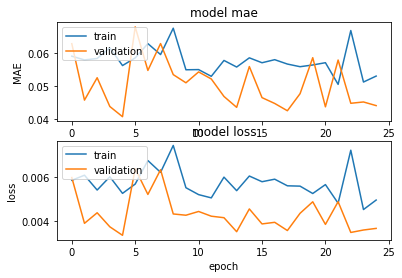

In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')
 
  # Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')
plt.show()

# used to keep plots from overlapping each other  
fig.tight_layout()
fig.savefig('my_plots.png')

In [28]:
# evauate r-squared score
y_pred = model.predict(features_test_scale)
print(r2_score(labels_test,y_pred))


0.803421479759223
